<a href="https://colab.research.google.com/github/akash-yede/Twittorials/blob/master/Generate_SEO_docx_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Generate SEO docx reports from a template**

This twittorial is prepared so that marketers can generate SEO report documents with the help of a template. This template can be reused again to generate multiple reports. 

We will be using pyppeteer and docxtpl libraries to implement this functionality.

First, we install the pyppeteer, asyncio, and docxtpl libraries.

In [1]:
!pip install -U git+https://github.com/pyppeteer/pyppeteer@dev
!pip install nest_asyncio
!pip install docxtpl

  Cloning https://github.com/pyppeteer/pyppeteer (to revision dev) to /tmp/pip-req-build-qa03ulbh
  Running command git clone -q https://github.com/pyppeteer/pyppeteer /tmp/pip-req-build-qa03ulbh
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 1.6MB/s 
  Using cached https://files.pythonhosted.org/packages/3b/00/2344469e2084fb287c2e0b57b72910309874c3245463acd6cf5e3db69324/appdirs-1.4.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
     |████████████████████████████████| 81kB 2.4MB/s 
  Created wheel for pyppeteer: filename=pyppeteer-0.2.2-cp36-none-any.whl size=145318 sha256=e4b82b3360dfc398637e0cdae2c2c34594bcf0559cd6259d960a75d6fc0b1bfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-u6zl7rue/wheels/f6/43/df/a622fde05c50bad23f603

Next, we are installing the chromium-chromedriver to enable using chromium browser in Google collaboratory.

In [2]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 6 not upgraded.
Need to get 79.2 MB of archives.
After this operation, 268 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 85.0.4183.121-0ubuntu0.18.04.1 [1,117 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 85.0.4183.121-0ubuntu0.18.04.1 [70.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 85.0.41

We are using the pyppeteer library to launch any website on the browser. For generating our reports, we are using the https://developers.google.com/speed/pagespeed/insights. We are generating a report for PageSpeed Insights. 

This report needs some time to generate. So, we are adding a timeout for 120 seconds. 

The next step is that we are taking a screenshot of the report.

In [3]:
from pyppeteer import launch
import asyncio
import time
import nest_asyncio
nest_asyncio.apply()

#Replace the value of the sitename with your own website's sitename.
sitename = 'www.example.com'

async def main():
    #Launch the chromium browser. This code will run in the background.
    browser = await launch(executablePath="/usr/lib/chromium-browser/chromium-browser",args=['--no-sandbox'])

    #Creating a new page on the browser
    page = await browser.newPage()
    await page.setViewport({ 'width': 800, 'height': 1100})
    
    #This code will reach the web page on the browser.
    await page.goto('https://developers.google.com/speed/pagespeed/insights/?url='+sitename+'&tab=desktop')
    
    #Add a timeout for 120 seconds. This is the approximate time that the website will take to generate the report.
    time.sleep(60)
    
    #Take a screenshot of the report and save it locally on colab.
    await page.screenshot({'path': 'screenshot.png'})
    
    await browser.close()

asyncio.get_event_loop().run_until_complete(main())

We are creating a template file in docx format. We'll be using the same file to generate reports.

The template file will consist of variables that we will be using to add our content from the render() method. These variables should be in the following format.

{{ site_name }} and {{ result }}

Find the screenshot of the content of the template file below.

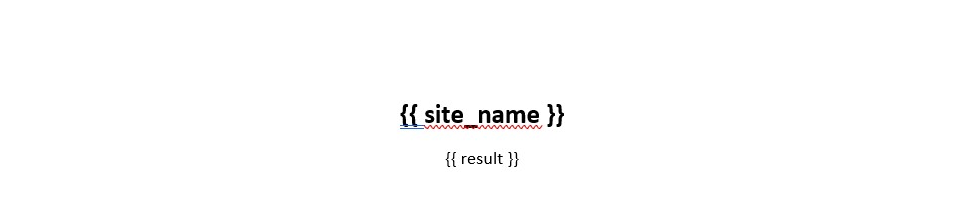


The final step here is to use this template file and add the content to generate a new file in .docx format. The content in our case includes the sitename and the screenshot. 

The final generated document is saved in your colab's local file explorer.

In [7]:
from docxtpl import DocxTemplate
from docxtpl import InlineImage
from docx.shared import Cm
import jinja2

#Creating a template in .docx format and upload the same in colab.
doc = DocxTemplate("template.docx")

#Add a sitename and result image inside context.
context = { 'site_name' : sitename }
result_img = InlineImage(doc,'screenshot.png', Cm(15))
context['result'] = result_img

#Adding the context inside the render() method.
doc.render(context)

#Saving a new doc with using the data from the context.
#This is the final document that is generated.
doc.save("generated_doc.docx")